In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Excel file and extracting all sheet names
data = pd.ExcelFile('Bookshop.xlsx')
sheets = data.sheet_names
sheets

['Book',
 'Author',
 'Info',
 'Award',
 'Checkouts',
 'Edition',
 'Publisher',
 'Ratings',
 'Series',
 'Sales Q1',
 'Sales Q2',
 'Sales Q3',
 'Sales Q4']

In [3]:
# Loading the 'Book' sheet into a DataFrame
book_df = pd.read_excel('Bookshop.xlsx', sheet_name='Book')
book_df.head()

,BookID,Title,AuthID
0,BB194,Ballinby Boys,AM329
1,NC652,Nothing But Capers,AS443
2,AD222,Alanna Saves the Day,BH149
3,PA169,Post Alley,BM856
4,TC188,Thatchwork Cottage,BM856


In [4]:
book_df.head()

,BookID,Title,AuthID
0,BB194,Ballinby Boys,AM329
1,NC652,Nothing But Capers,AS443
2,AD222,Alanna Saves the Day,BH149
3,PA169,Post Alley,BM856
4,TC188,Thatchwork Cottage,BM856


In [5]:
# Loading the 'Author' sheet and processing author information
author_df = pd.read_excel('Bookshop.xlsx', sheet_name='Author')
author_df.head()

,AuthID,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day
0,AS443,Abraham,Stackhouse,2147-07-01,Norway,6.0
1,AW980,Amelia,"Wangerin, Jr.",2141-03-26,New Zealand,16.0
2,AI923,Anastasia,Inez,2148-03-30,New Zealand,11.0
3,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0
4,AH957,Arturo,Hijuelos,2129-01-09,United Kingdom,8.0


In [6]:
# combine the first name and last name
author_df.insert(1,'Author',author_df['First Name']+' '+author_df['Last Name'])
# drop the first name and last name
author_df.drop(['First Name','Last Name','Birthday','Country of Residence','Hrs Writing per Day'],axis=1, inplace=True)
author_df.head()

,AuthID,Author
0,AS443,Abraham Stackhouse
1,AW980,"Amelia Wangerin, Jr."
2,AI923,Anastasia Inez
3,AM329,Arthur McCrumb
4,AH957,Arturo Hijuelos


In [7]:
# Loading the 'Info' sheet into a dataframe
info_df = pd.read_excel('Bookshop.xlsx', sheet_name='Info')
info_df.head()

,BookID1,BookID2,Genre,SeriesID,Volume Number,Staff Comment
0,MM,424,Young Adult,NaN,NaN,Would you want to live forever? Doesn't that d...
1,NR,695,Mystery,IR-ESP,1.0,NaN
2,AM,124,Fiction,NaN,NaN,"""This graphic novel is better than years of ma..."
3,AK,974,Young Adult,NaN,NaN,NaN
4,AD,222,Childrens,NaN,NaN,Alanna didn't expect this Tuesday to be any di...


In [8]:
# we can join BookID1 and BookID2 to get the BookID and then drop BookID1 and BookID2
info_df.insert(0,'BookID',info_df['BookID1']+info_df['BookID2'].astype(str))
info_df.drop(['BookID1','BookID2','SeriesID','Volume Number','Staff Comment'],axis=1, inplace=True)
info_df.head()

,BookID,Genre
0,MM424,Young Adult
1,NR695,Mystery
2,AM124,Fiction
3,AK974,Young Adult
4,AD222,Childrens


In [9]:
# Load award-related data
award_df = pd.read_excel('Bookshop.xlsx',sheet_name='Award')
award_df.head()

,Title,Award Name,Year Won
0,Post Alley,Agatha Award,2179
1,Alanna Saves the Day,Caldecott Medal,2186
2,Portmeirion,Hugo Award,2188
3,Rystwyth,Hugo Award,2193
4,The Mallemaroking,Hugo Award,2179


In [10]:
# Load book checkout data
checkout_df = pd.read_excel('Bookshop.xlsx', sheet_name='Checkouts')
checkout_df.head()

,BookID,CheckoutMonth,Number of Checkouts
0,AD222,1,40
1,AD222,3,39
2,AD222,11,34
3,AD222,4,33
4,AD222,5,33


In [11]:
 # Load book edition details
edition_df = pd.read_excel('Bookshop.xlsx', sheet_name='Edition')
edition_df.head()

,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),Price
0,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99
1,989-28-654-6930-3,NP937,Hardcover,PP,2178-08-18,394,6,30.99
2,989-28-79-52883-6,PA169,Hardcover,PP,2178-09-08,384,10,27.99
3,989-28-79-43574-5,TM925,Graphic,ESP,2178-09-15,187,8,23.99
4,989-28-654-5794-2,HS107,Hardcover,PP,2178-09-29,640,3,26.99


In [12]:
# Load publisher information
publish_df = pd.read_excel('Bookshop.xlsx',sheet_name='Publisher')
publish_df.head()

,PubID,Publishing House,City,State,Country,Year Established,Marketing Spend
0,CHP,Cedar House Publishers,Friday Harbor,Washington,USA,2086,72000
1,SSC,Sound & Seas Co.,Dunedin,Otago,New Zealand,2153,151000
2,PP,Palimpsest Printing,Edinburgh,Scotland,UK,1982,48000
3,ESP,Etaoin Shrdlu Press,Seattle,Washington,USA,2069,2320000


In [13]:
# Load book ratings data
rating_df = pd.read_excel('Bookshop.xlsx', sheet_name='Ratings')
rating_df.head()

,BookID,Rating,ReviewerID,ReviewID
0,AD222,5,105,3372
1,AD222,3,113,7340
2,AD222,3,234,20430
3,AD222,4,459,40653
4,AD222,2,550,51337


In [14]:
# Renaming and cleaning the 'Ratings' sheet for consistency
rating_df.rename(columns={'ReviewerID':'UserID'},inplace=True)
rating_df.drop('ReviewID',axis=1,inplace=True)

In [15]:
# Combining quarterly sales data into one DataFrame
sales_q1_df = pd.read_excel('Bookshop.xlsx', sheet_name='Sales Q1')
sales_q2_df = pd.read_excel('Bookshop.xlsx', sheet_name='Sales Q2')
sales_q3_df = pd.read_excel('Bookshop.xlsx', sheet_name='Sales Q3')
sales_q4_df = pd.read_excel('Bookshop.xlsx', sheet_name='Sales Q4')

In [16]:
sales_data = pd.concat([sales_q1_df, sales_q2_df, sales_q3_df, sales_q4_df],ignore_index=True)
sales_data.head()

,Sale Date,ISBN,Discount,ItemID,OrderID
0,2193-01-02,989-28-3705-007-2,NaN,107020-91-8011,107020-1
1,2193-01-02,989-28-79-11297-4,NaN,107020-9-3293,107020-10
2,2193-01-02,989-28-79-11297-4,NaN,107020-91-4622,107020-11
3,2193-01-02,989-28-79-18127-7,NaN,107020-38-4663,107020-12
4,2193-01-02,989-28-79-82197-5,0.15,107020-1-1485,107020-13


In [17]:
# Dropping unnecessary columns from the sales data
sales_data.drop('Discount',axis=1,inplace=True)

# Merging additional DataFrames to create a comprehensive dataset

In [18]:
books_with_authors = pd.merge(book_df, author_df, left_on='AuthID', right_on='AuthID', how='inner')
books_with_authors.head()

,BookID,Title,AuthID,Author
0,BB194,Ballinby Boys,AM329,Arthur McCrumb
1,NC652,Nothing But Capers,AS443,Abraham Stackhouse
2,AD222,Alanna Saves the Day,BH149,Bernard Hopf
3,PA169,Post Alley,BM856,Burton Malamud
4,TC188,Thatchwork Cottage,BM856,Burton Malamud


In [19]:
books_with_authors.drop('AuthID',axis=1,inplace=True)

In [20]:
books_with_info = pd.merge(books_with_authors,info_df,left_on='BookID', right_on='BookID', how='inner')
books_with_info.head()

,BookID,Title,Author,Genre
0,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy
1,NC652,Nothing But Capers,Abraham Stackhouse,Nonfiction
2,AD222,Alanna Saves the Day,Bernard Hopf,Childrens
3,PA169,Post Alley,Burton Malamud,Fiction
4,TC188,Thatchwork Cottage,Burton Malamud,Fiction


In [21]:
books_with_checkouts = pd.merge(books_with_info, checkout_df, left_on='BookID', right_on='BookID', how='left')
books_with_checkouts.head()

,BookID,Title,Author,Genre,CheckoutMonth,Number of Checkouts
0,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0
1,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,4.0,33.0
2,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,5.0,32.0
3,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,6.0,29.0
4,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,7.0,29.0


In [22]:
books_with_checkouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 0 to 657
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BookID               658 non-null    object 
 1   Title                658 non-null    object 
 2   Author               658 non-null    object 
 3   Genre                658 non-null    object 
 4   CheckoutMonth        656 non-null    float64
 5   Number of Checkouts  656 non-null    float64
dtypes: float64(2), object(4)
memory usage: 36.0+ KB


In [23]:
# Handling missing data in the checkout information
books_with_checkouts['CheckoutMonth'].fillna(books_with_checkouts['CheckoutMonth'].mode()[0],inplace=True)
books_with_checkouts['Number of Checkouts'].fillna(books_with_checkouts['Number of Checkouts'].median(),inplace=True)

In [24]:
books_with_editions = pd.merge(books_with_checkouts, edition_df, left_on='BookID', right_on='BookID', how='inner')
books_with_editions.head()

,BookID,Title,Author,Genre,CheckoutMonth,Number of Checkouts,ISBN,Format,PubID,Publication Date,Pages,Print Run Size (k),Price
0,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5
1,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,4.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5
2,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,5.0,32.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5
3,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,6.0,29.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5
4,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,7.0,29.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5


In [25]:
final_df = pd.merge(books_with_editions, rating_df, left_on='BookID', right_on='BookID', how='left')
final_df.head()

,BookID,Title,Author,Genre,CheckoutMonth,Number of Checkouts,ISBN,Format,PubID,Publication Date,Pages,Print Run Size (k),Price,Rating,UserID
0,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,5.0,225.0
1,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,3.0,282.0
2,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,4.0,387.0
3,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,4.0,421.0
4,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,3.0,451.0


In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012389 entries, 0 to 1012388
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   BookID               1012389 non-null  object        
 1   Title                1012389 non-null  object        
 2   Author               1012389 non-null  object        
 3   Genre                1012389 non-null  object        
 4   CheckoutMonth        1012389 non-null  float64       
 5   Number of Checkouts  1012389 non-null  float64       
 6   ISBN                 1012389 non-null  object        
 7   Format               1012389 non-null  object        
 8   PubID                1012389 non-null  object        
 9   Publication Date     1012389 non-null  datetime64[ns]
 10  Pages                1012389 non-null  int64         
 11  Print Run Size (k)   1012389 non-null  int64         
 12  Price                1012389 non-null  float64       
 1

In [27]:
# Dropping rows with any remaining missing values
final_df.dropna(inplace=True)

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012387 entries, 0 to 1012388
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   BookID               1012387 non-null  object        
 1   Title                1012387 non-null  object        
 2   Author               1012387 non-null  object        
 3   Genre                1012387 non-null  object        
 4   CheckoutMonth        1012387 non-null  float64       
 5   Number of Checkouts  1012387 non-null  float64       
 6   ISBN                 1012387 non-null  object        
 7   Format               1012387 non-null  object        
 8   PubID                1012387 non-null  object        
 9   Publication Date     1012387 non-null  datetime64[ns]
 10  Pages                1012387 non-null  int64         
 11  Print Run Size (k)   1012387 non-null  int64         
 12  Price                1012387 non-null  float64       
 1

In [29]:
final_df.describe()

,CheckoutMonth,Number of Checkouts,Pages,Print Run Size (k),Price,Rating,UserID
count,1.012387e+06,1.012387e+06,1.012387e+06,1.012387e+06,1.012387e+06,1.012387e+06,1.012387e+06
mean,6.490814e+00,3.188572e+01,4.044587e+02,2.303872e+01,1.537763e+01,4.131532e+00,2.658607e+04
std,3.446516e+00,3.351670e+01,2.987035e+02,1.700459e+01,7.716827e+00,9.395070e-01,1.535526e+04
min,1.000000e+00,2.000000e+00,1.100000e+01,2.000000e+00,5.990000e+00,1.000000e+00,3.000000e+00
25%,3.000000e+00,9.000000e+00,2.550000e+02,1.000000e+01,8.990000e+00,4.000000e+00,1.327500e+04
50%,6.000000e+00,1.700000e+01,3.730000e+02,1.800000e+01,1.250000e+01,4.000000e+00,2.643800e+04
75%,9.000000e+00,4.500000e+01,4.930000e+02,3.200000e+01,2.150000e+01,5.000000e+00,3.979000e+04
max,1.200000e+01,1.300000e+02,1.296000e+03,7.800000e+01,4.800000e+01,5.000000e+00,5.342400e+04


# Exploratory Data Analysis (EDA)

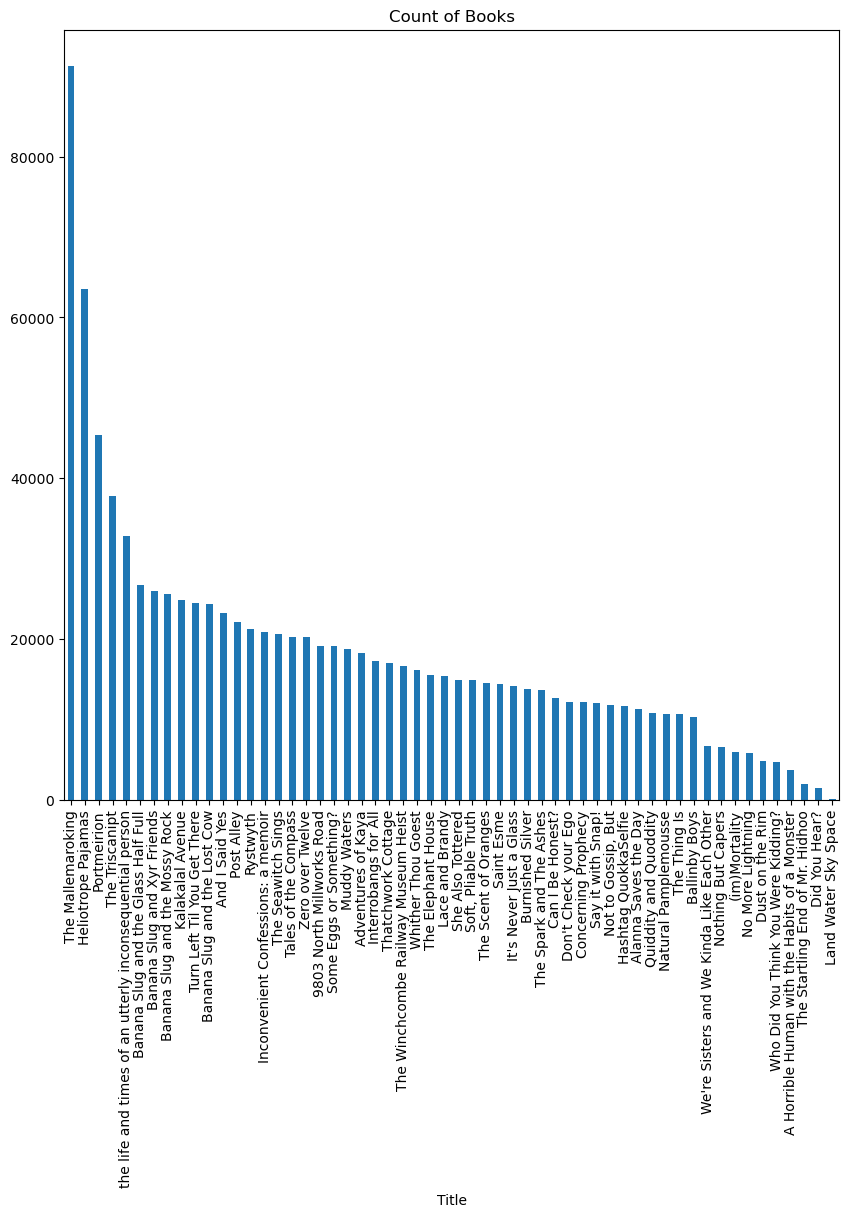

In [30]:
# Count of books by title
plt.figure(figsize=(10,10))
final_df.value_counts('Title').plot(kind='bar')
plt.title('Count of Books')
plt.show()

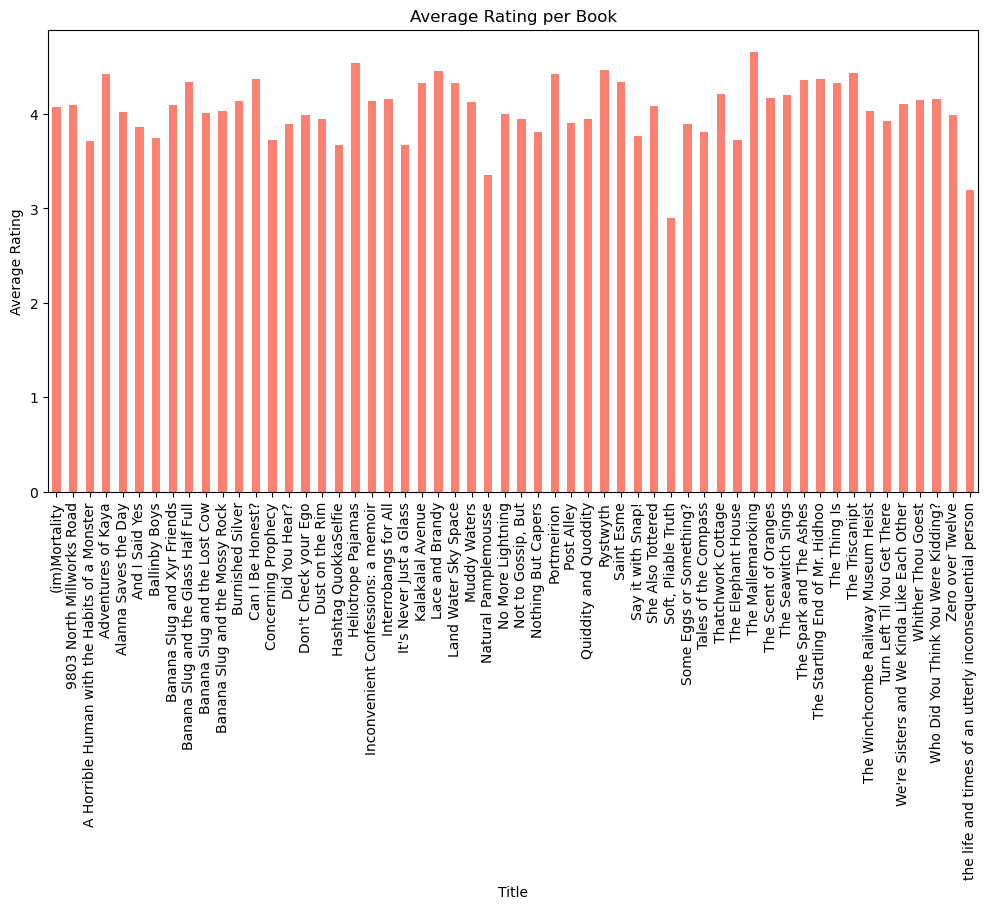

In [31]:
avg_rating_per_book = final_df.groupby('Title')['Rating'].mean()

plt.figure(figsize=(12, 6))
avg_rating_per_book.plot(kind='bar', color='salmon')
plt.title("Average Rating per Book")
plt.xlabel("Title")
plt.ylabel("Average Rating")
plt.show()

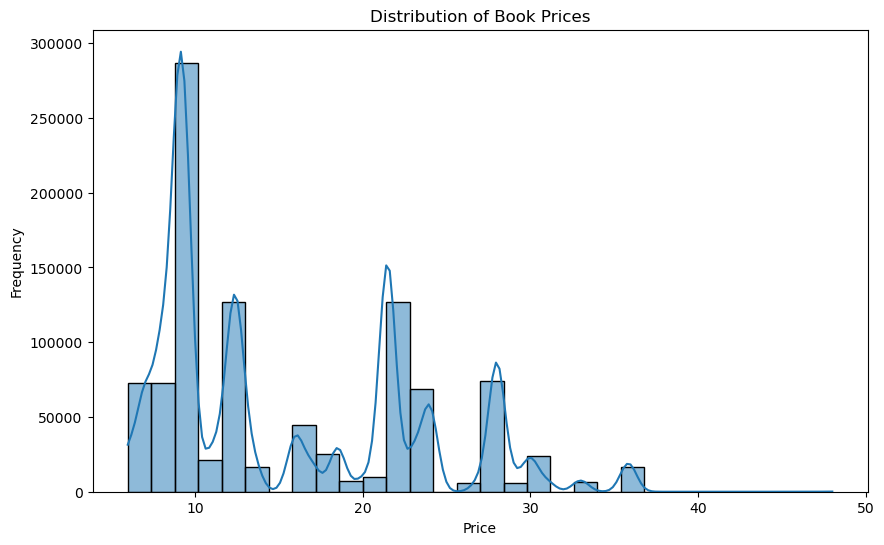

In [32]:
# Distribution of book prices
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Price'], bins=30, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

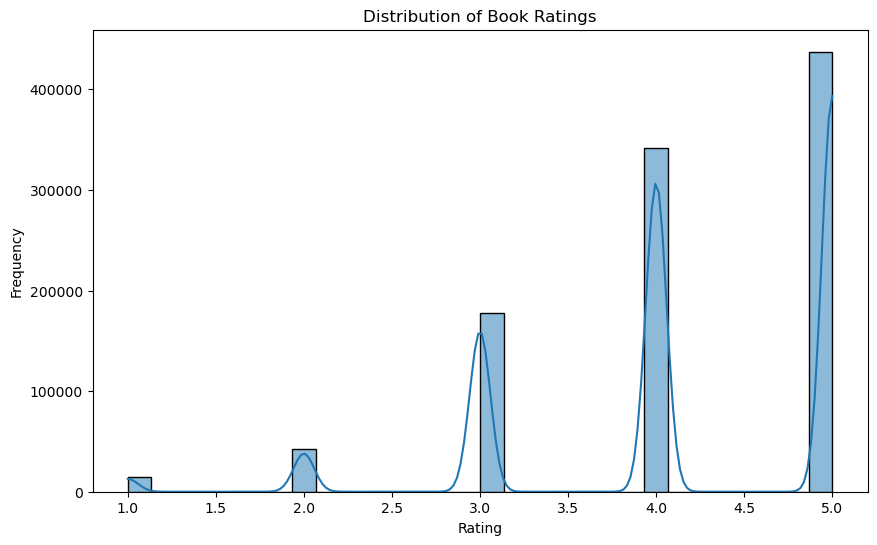

In [33]:
# Distribution of Rating
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Rating'], bins=30, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

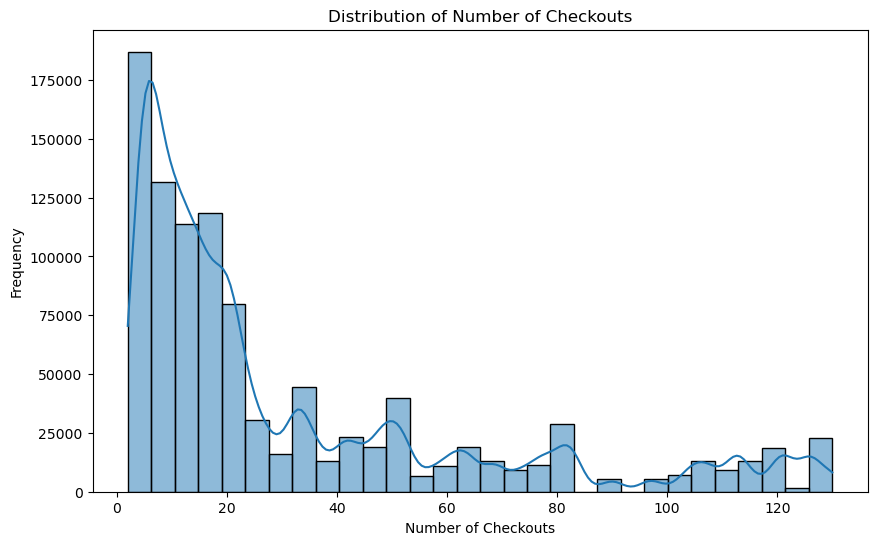

In [34]:
# Distribution of Number of Checkouts
plt.figure(figsize=(10, 6))
sns.histplot(x=final_df['Number of Checkouts'], bins=30, kde=True)
plt.title('Distribution of Number of Checkouts')
plt.xlabel('Number of Checkouts')
plt.ylabel('Frequency')
plt.show()

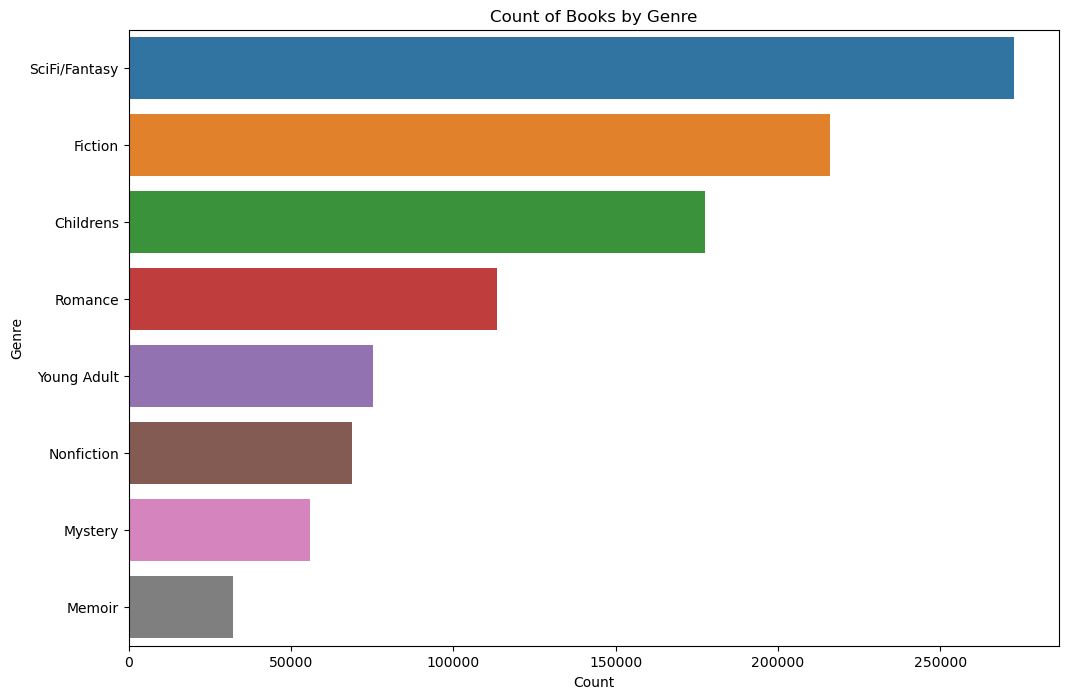

In [35]:
# Analyzing the popularity of genres
plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=final_df, order=final_df['Genre'].value_counts().index)
plt.title('Count of Books by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

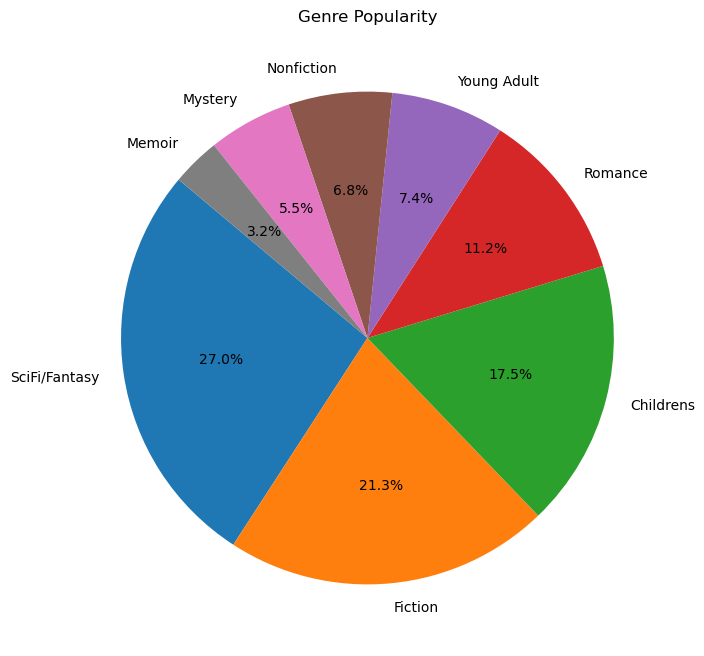

In [36]:
genre_counts = final_df['Genre'].value_counts() #counting each genre
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Genre Popularity")
plt.show()

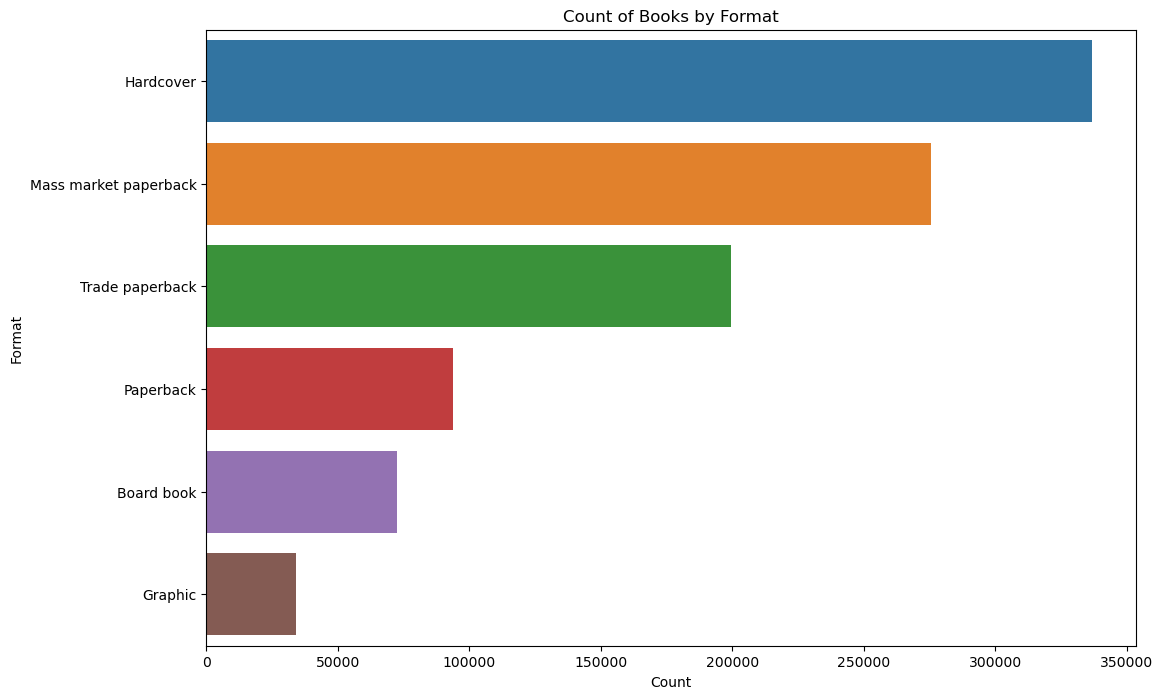

In [37]:
# Count plot for Format
plt.figure(figsize=(12, 8))
sns.countplot(y='Format', data=final_df, order=final_df['Format'].value_counts().index)
plt.title('Count of Books by Format')
plt.xlabel('Count')
plt.ylabel('Format')
plt.show()

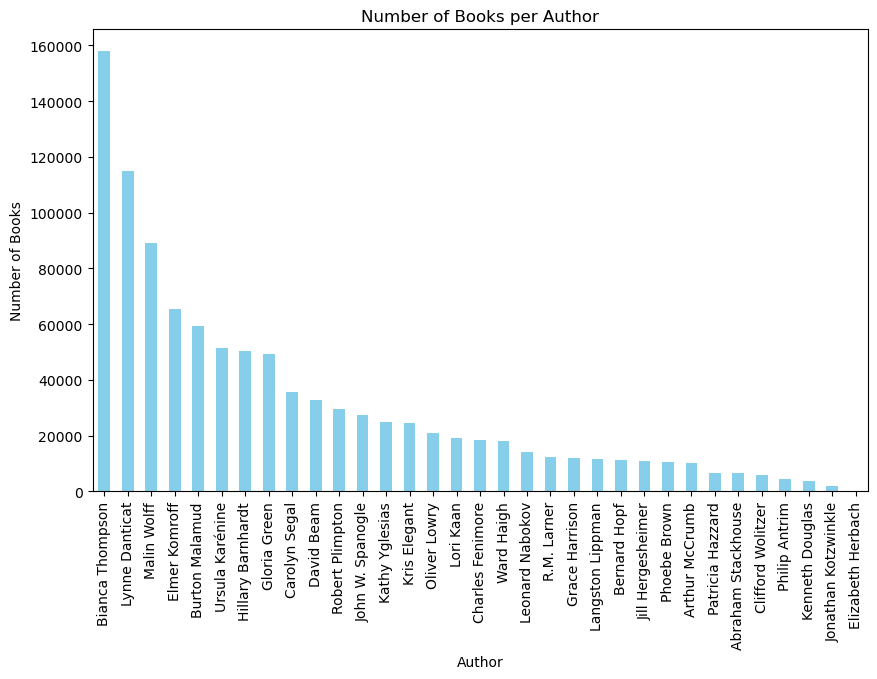

In [38]:
books_per_author = final_df['Author'].value_counts()

plt.figure(figsize=(10, 6))
books_per_author.plot(kind='bar', color='skyblue')
plt.title("Number of Books per Author")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.show()

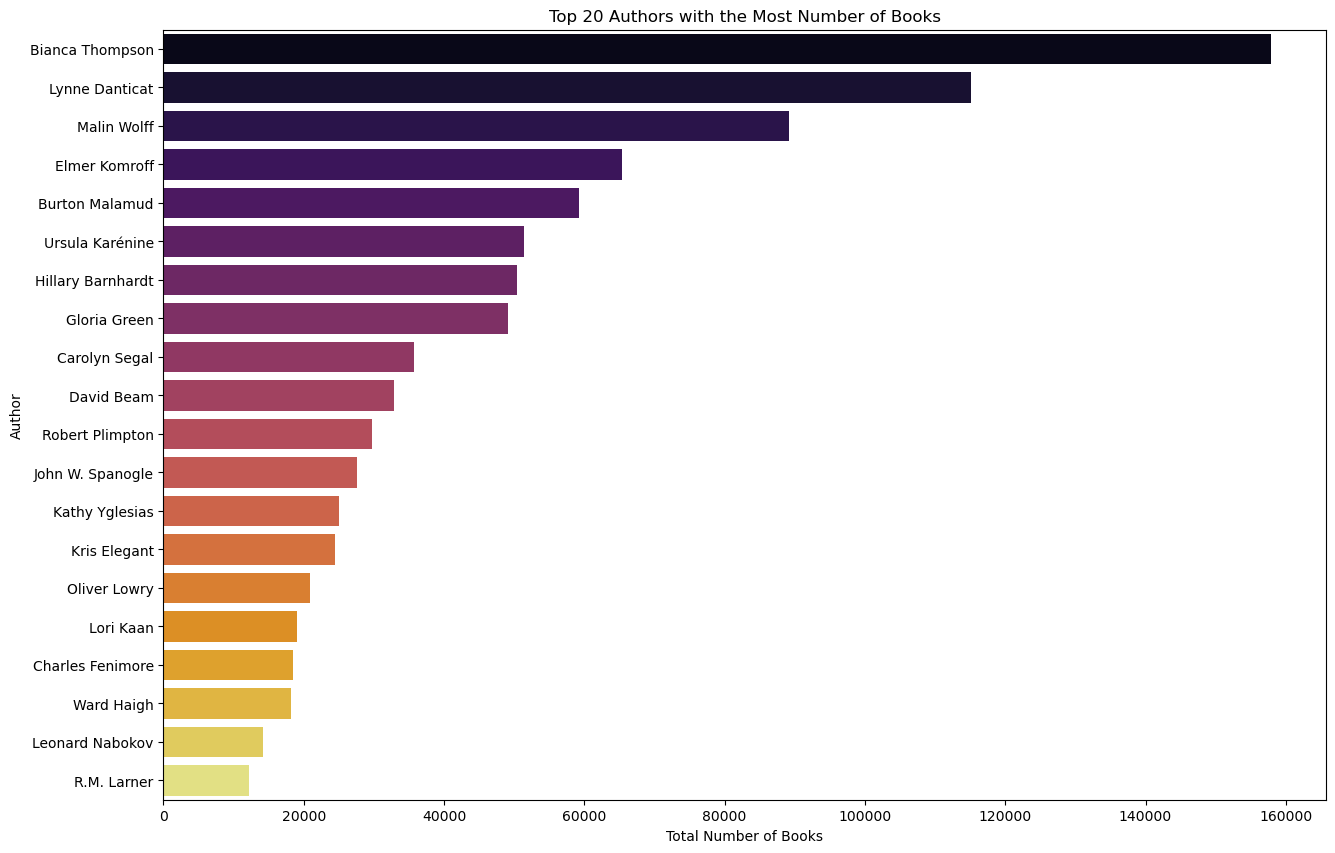

In [39]:
book_count = final_df.groupby('Author')['Title'].count().reset_index().sort_values('Title', ascending=False).head(20).set_index('Author')

plt.figure(figsize=(15, 10))
sns.barplot(x=book_count['Title'], y=book_count.index, palette='inferno')
plt.title("Top 20 Authors with the Most Number of Books")
plt.xlabel("Total Number of Books")
plt.ylabel("Author")
plt.show()

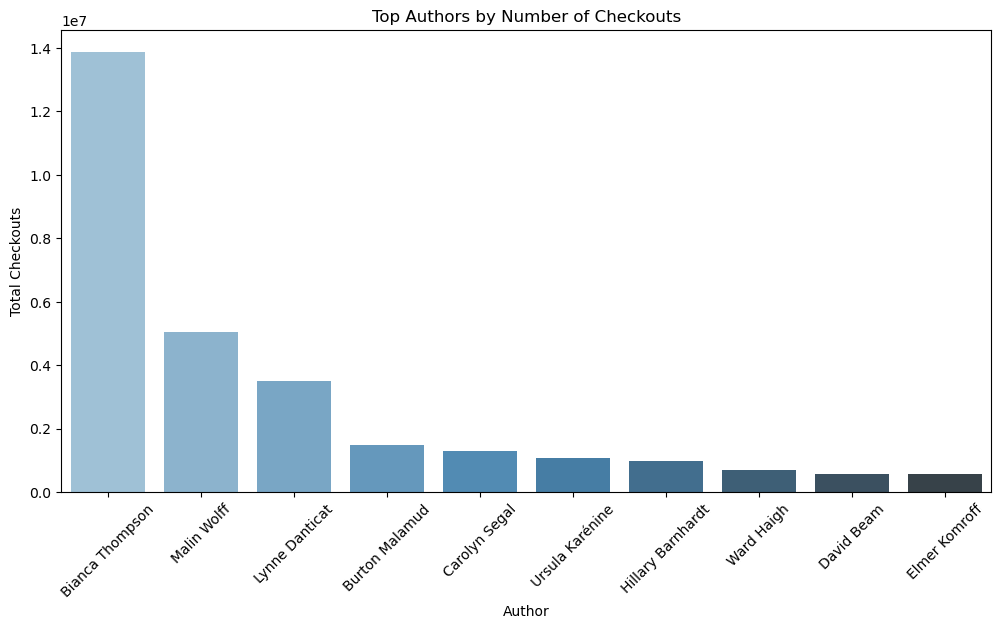

In [40]:
top_authors_sales = final_df.groupby('Author')['Number of Checkouts'].sum().reset_index()
top_authors_sales = top_authors_sales.sort_values(by='Number of Checkouts', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_authors_sales, x='Author', y='Number of Checkouts', palette="Blues_d")
plt.title('Top Authors by Number of Checkouts')
plt.xlabel('Author')
plt.ylabel('Total Checkouts')
plt.xticks(rotation=45)
plt.show()

In [41]:
df = final_df.copy()

In [42]:
df.head()

,BookID,Title,Author,Genre,CheckoutMonth,Number of Checkouts,ISBN,Format,PubID,Publication Date,Pages,Print Run Size (k),Price,Rating,UserID
0,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,5.0,225.0
1,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,3.0,282.0
2,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,4.0,387.0
3,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,4.0,421.0
4,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,ESP,2179-05-18,401,10,21.5,3.0,451.0


In [43]:
df = df[['BookID', 'Title', 'Author', 'Genre', 'CheckoutMonth','Number of Checkouts', 'ISBN', 'Format','Pages','Price', 'Rating', 'UserID']]
df.head()

,BookID,Title,Author,Genre,CheckoutMonth,Number of Checkouts,ISBN,Format,Pages,Price,Rating,UserID
0,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,401,21.5,5.0,225.0
1,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,401,21.5,3.0,282.0
2,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,401,21.5,4.0,387.0
3,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,401,21.5,4.0,421.0
4,BB194,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,3.0,33.0,989-28-79-68089-3,Hardcover,401,21.5,3.0,451.0


In [44]:
# Recommending popular books based on the total number of checkouts
def recommend_popular_by_checkouts(top_n=10):
    popular_books = df.groupby('Title')['Number of Checkouts'].sum().sort_values(ascending=False).head(top_n)
    return popular_books.reset_index()

# Displaying the top 10 popular books by checkouts
print("Popular Books by Checkouts:")
print(recommend_popular_by_checkouts())

Popular Books by Checkouts:
                       Title  Number of Checkouts
0          The Mallemaroking            9451772.0
1         Heliotrope Pajamas            4810428.0
2                   Rystwyth            2354976.0
3                Portmeirion            2067660.0
4           Zero over Twelve             968832.0
5               Muddy Waters             894608.0
6             The Triscanipt             816368.0
7  9803 North Millworks Road             747586.0
8         The Seawitch Sings             735732.0
9         Adventures of Kaya             703888.0


In [45]:
# Recommending popular books based on average ratings
def recommend_popular_by_ratings(top_n=10):
    popular_books = df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(top_n)
    return popular_books.reset_index()

# Displaying the top 10 popular books by ratings
print("Popular Books by Ratings:")
print(recommend_popular_by_ratings())

Popular Books by Ratings:
                             Title    Rating
0                The Mallemaroking  4.659653
1               Heliotrope Pajamas  4.543651
2                         Rystwyth  4.460407
3                  Lace and Brandy  4.453271
4                   The Triscanipt  4.430838
5                      Portmeirion  4.423810
6               Adventures of Kaya  4.421885
7                 Can I Be Honest?  4.372401
8  The Startling End of Mr. Hidhoo  4.370370
9          The Spark and The Ashes  4.358907


# Feature Transformation and PCA

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [47]:
# Feature engineering and preprocessing for clustering
scaler = StandardScaler()  
le = LabelEncoder()

In [48]:
df.columns

Index(['BookID', 'Title', 'Author', 'Genre', 'CheckoutMonth',
       'Number of Checkouts', 'ISBN', 'Format', 'Pages', 'Price', 'Rating',
       'UserID'],
      dtype='object')

In [49]:
# Scaling numerical features for clustering
df[['Number of Checkouts','Pages','Price']] = scaler.fit_transform(df[['Number of Checkouts','Pages','Price']])

In [50]:
# Encoding categorical features for clustering
df['Genre'] = le.fit_transform(df['Genre'])
df['Format'] = le.fit_transform(df['Format'])

In [51]:
df.head()

,BookID,Title,Author,Genre,CheckoutMonth,Number of Checkouts,ISBN,Format,Pages,Price,Rating,UserID
0,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,5.0,225.0
1,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,3.0,282.0
2,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,4.0,387.0
3,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,4.0,421.0
4,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,3.0,451.0


In [52]:
features = df[['Genre','Number of Checkouts','Format','Pages','Price','Rating']]

In [53]:
# Applying Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA()
pca.fit(features)

PCA()

In [54]:
pca.explained_variance_ratio_

array([0.54357404, 0.17451997, 0.10557083, 0.08596241, 0.05791134,
       0.03246141])

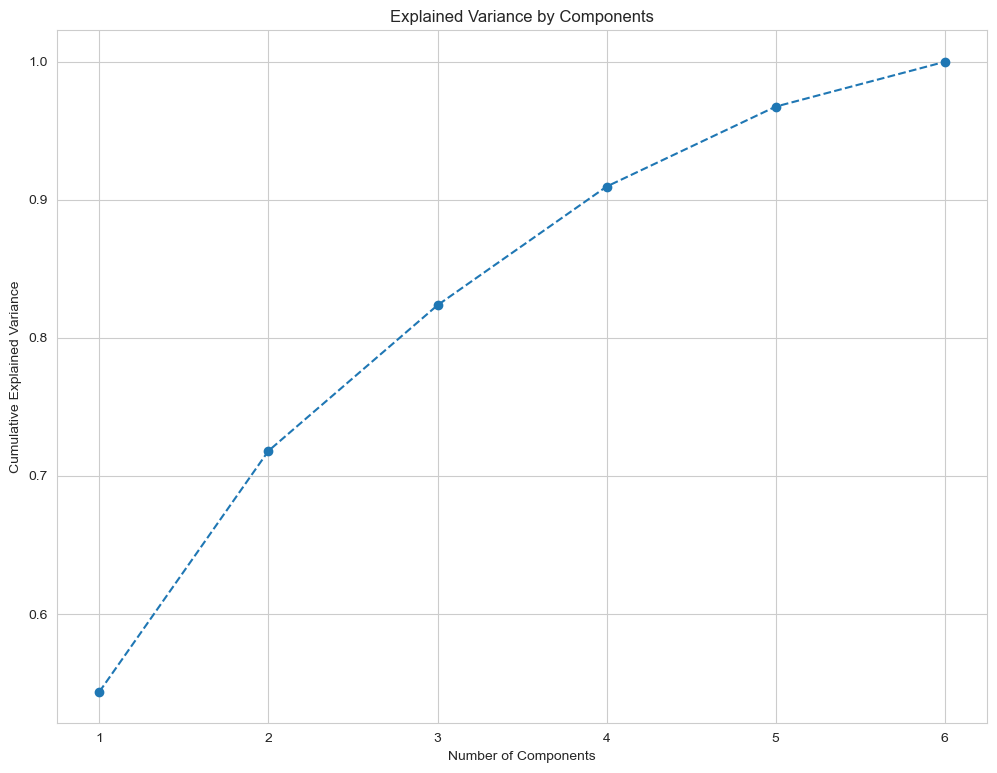

In [55]:
# Visualizing explained variance to determine optimal number of components
sns.set_style('whitegrid')
plt.figure(figsize=(12,9))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [56]:
pca = PCA(n_components=4)
pca_result=pca.fit_transform(features)

# Clustering and Recommendations

In [57]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []   # List to store within-cluster sum of squares for each number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

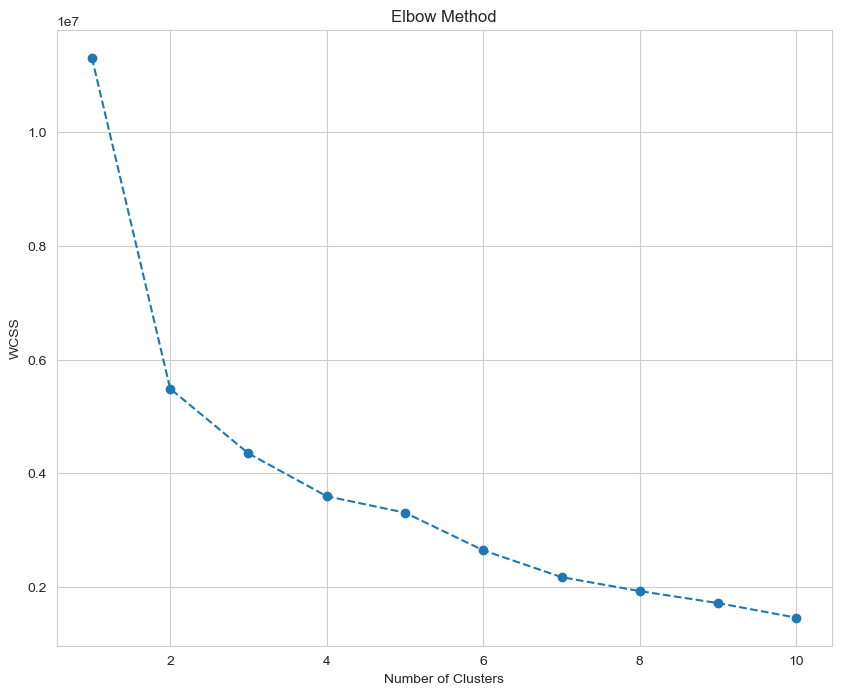

In [58]:
# Plotting the Elbow Curve
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [59]:
# Fitting KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(pca_result)

In [60]:
df.head()

,BookID,Title,Author,Genre,CheckoutMonth,Number of Checkouts,ISBN,Format,Pages,Price,Rating,UserID,Cluster
0,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,5.0,225.0,2
1,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,3.0,282.0,2
2,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,4.0,387.0,2
3,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,4.0,421.0,2
4,BB194,Ballinby Boys,Arthur McCrumb,6,3.0,0.033245,989-28-79-68089-3,2,-0.011579,0.79338,3.0,451.0,2


In [61]:
# Function to recommend similar books based on clustering
def recommend_books(book_title, top_n=10):
    if book_title not in df['Title'].values:
        return "Book not found."    # Return a message if the book is not found
    
    cluster_label = df.loc[df['Title'] == book_title]['Cluster'].values[0]   # Get the cluster of the input book
    recommended_books = df[(df['Cluster'] == cluster_label) & (df['Title'] != book_title)]  # Find similar books in the same cluster

    if recommended_books.empty:
        return "No similar books found in this cluster."
        
    # Return the top N recommended books
    recommended_titles = recommended_books[['Title','Author']].drop_duplicates().reset_index(drop=True)
    return recommended_titles[:top_n]

In [62]:
print("Recommendations for 'Nothing But Capers':")
recommend_books('Nothing But Capers')

Recommendations for 'Nothing But Capers':


,Title,Author
0,Ballinby Boys,Arthur McCrumb
1,Zero over Twelve,Burton Malamud
2,Portmeirion,Bianca Thompson
3,The Mallemaroking,Bianca Thompson
4,Can I Be Honest?,Charles Fenimore
5,9803 North Millworks Road,Carolyn Segal
6,The Winchcombe Railway Museum Heist,Carolyn Segal
7,(im)Mortality,Clifford Wolitzer
8,Land Water Sky Space,Elizabeth Herbach
9,Concerning Prophecy,Grace Harrison


# Collaborative Filtering

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
# Creating a user-item matrix for collaborative filtering
user_item_matrix = df.pivot_table(index='UserID', columns='Title', values='Rating').fillna(0)

In [65]:
# Compute cosine similarity between users
user_similarity_matrix = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

In [66]:
# Function to recommend books to a user based on similar users
def recommend_books_collaborative_on_user(user_id, top_n=10):
    if user_id not in user_similarity_df.index:
        return ["User not found."]
    
    # Find similar users and average their preferences
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:top_n + 1]
    recommended_books_indices = user_item_matrix.loc[similar_users.index].mean(axis=0).sort_values(ascending=False).index.tolist()
    
    return recommended_books_indices[:top_n]  # Return top N book recommendations

In [67]:
recommend_books_collaborative_on_user(53365.)

['Adventures of Kaya',
 '(im)Mortality',
 'The Mallemaroking',
 'Post Alley',
 'Quiddity and Quoddity',
 'Rystwyth',
 'Saint Esme',
 'Say it with Snap!',
 'She Also Tottered',
 'Soft, Pliable Truth']

In [68]:
# Create a pivot table with 'Title' as the index and 'UserID' as the columns
book_user_matrix = df.pivot_table(index='Title', columns='UserID', values='Rating').fillna(0)

In [69]:
# Computing cosine similarity between items (books) based on the user-item matrix
book_similarity_matrix = cosine_similarity(book_user_matrix)
book_similarity_df = pd.DataFrame(book_similarity_matrix, index=book_user_matrix.index, columns=book_user_matrix.index)

In [70]:
# Function to recommend books similar to a given book based on item similarity
def recommend_books_collaborative_on_books(book_title, top_n=10):
    if book_title not in book_similarity_df.index:
        return ["Book not found."]
    
    # Find the most similar books
    similar_books = book_similarity_df[book_title].sort_values(ascending=False).iloc[1:top_n + 1]
    return similar_books.index.tolist()   # Return the titles of the most similar books

In [71]:
recommend_books_collaborative_on_books('Post Alley')

['9803 North Millworks Road',
 'Turn Left Til You Get There',
 'Tales of the Compass',
 'Banana Slug and Xyr Friends',
 'Portmeirion',
 'Concerning Prophecy',
 'Natural Pamplemousse',
 "It's Never Just a Glass",
 'A Horrible Human with the Habits of a Monster',
 'The Mallemaroking']